### Course Recommendation with Predictive Analytics

Predictive Analytics to estimate grades of students by exploring and analysing academic and non-academic information of students

#### Import libraries for data analysis

In [2]:
import numpy as np
import pandas as pd

#### Import libraries for data visualisation

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Import libraries for machine learning

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Load and merge to unified dataset

In [7]:
df_mat = pd.read_csv("student-mat.csv")

In [10]:
df_por = pd.read_csv("student-por.csv")

In [12]:
df = pd.merge(df_mat, df_por, how='left', suffixes=(None, "_y"), left_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], \
                          right_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [14]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'guardian_y',
       'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y', 'famsup_y',
       'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
       'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y',
       'G1_y', 'G2_y', 'G3_y'],
      dtype='object')

In [15]:
df_examples = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [16]:
df_examples.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Convert non-numerical data to numerical data

In [17]:
df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
df_examples['address'] = df_examples['address'].map({'R': 0, 'U': 1}).astype(int)
df_examples['famsize'] = df_examples['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
df_examples['Pstatus'] = df_examples['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
df_examples['Mjob'] = df_examples['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['Fjob'] = df_examples['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
df_examples['reason'] = df_examples['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
df_examples['guardian'] = df_examples['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
df_examples['schoolsup'] = df_examples['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['famsup'] = df_examples['famsup'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['paid'] = df_examples['paid'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['activities'] = df_examples['activities'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['nursery'] = df_examples['nursery'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['higher'] = df_examples['higher'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['internet'] = df_examples['internet'].map({'no': 0, 'yes': 1}).astype(int)
df_examples['romantic'] = df_examples['romantic'].map({'no': 0, 'yes': 1}).astype(int)

<ipython-input-17-f2ebdeebc08c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['school'] = df_examples['school'].map({'GP': 0, 'MS': 1}).astype(int)
<ipython-input-17-f2ebdeebc08c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_examples['sex'] = df_examples['sex'].map({'F': 0, 'M': 1}).astype(int)
<ipython-input-17-f2ebdeebc08c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

#### Correlation of features

In [18]:
corr = df_examples.corr()
corr.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.025139,0.376704,-0.277095,-0.065662,0.044307,-0.144265,-0.090747,-0.064173,0.011223,...,-0.072780,0.015606,-0.020438,0.112023,0.059819,-0.037768,-0.089104,-0.033213,-0.056573,-0.054836
sex,-0.025139,1.000000,-0.033941,-0.019370,-0.077758,0.028501,0.092762,0.049241,0.202360,0.095259,...,0.065760,0.232397,0.071819,0.259949,0.263709,0.143266,-0.070324,0.092725,0.089692,0.095790
age,0.376704,-0.033941,1.000000,-0.142339,-0.034142,0.031052,-0.167380,-0.166154,-0.066866,-0.037473,...,0.042374,0.012131,0.125013,0.128170,0.116355,-0.066089,0.176582,-0.075825,-0.151792,-0.171036
address,-0.277095,-0.019370,-0.142339,1.000000,-0.061787,-0.036980,0.139377,0.074585,0.118235,0.005054,...,0.016206,0.033076,0.065796,-0.098214,-0.105325,-0.033840,-0.031959,0.063657,0.117673,0.094048
famsize,-0.065662,-0.077758,-0.034142,-0.061787,1.000000,0.154814,0.046279,0.062380,-0.056174,0.091003,...,0.024875,-0.018556,-0.024308,-0.107035,-0.108456,0.035555,-0.040535,-0.075366,-0.084788,-0.088003


Check if there're any null values in the dataset

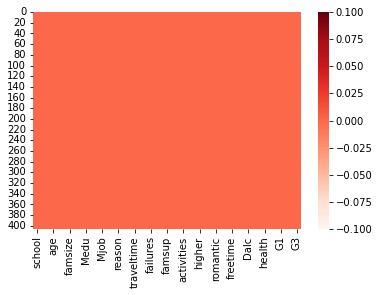

In [19]:
sns.heatmap(df_examples.isnull(),cmap='Reds')

Draw heatmap with computed correlation scores

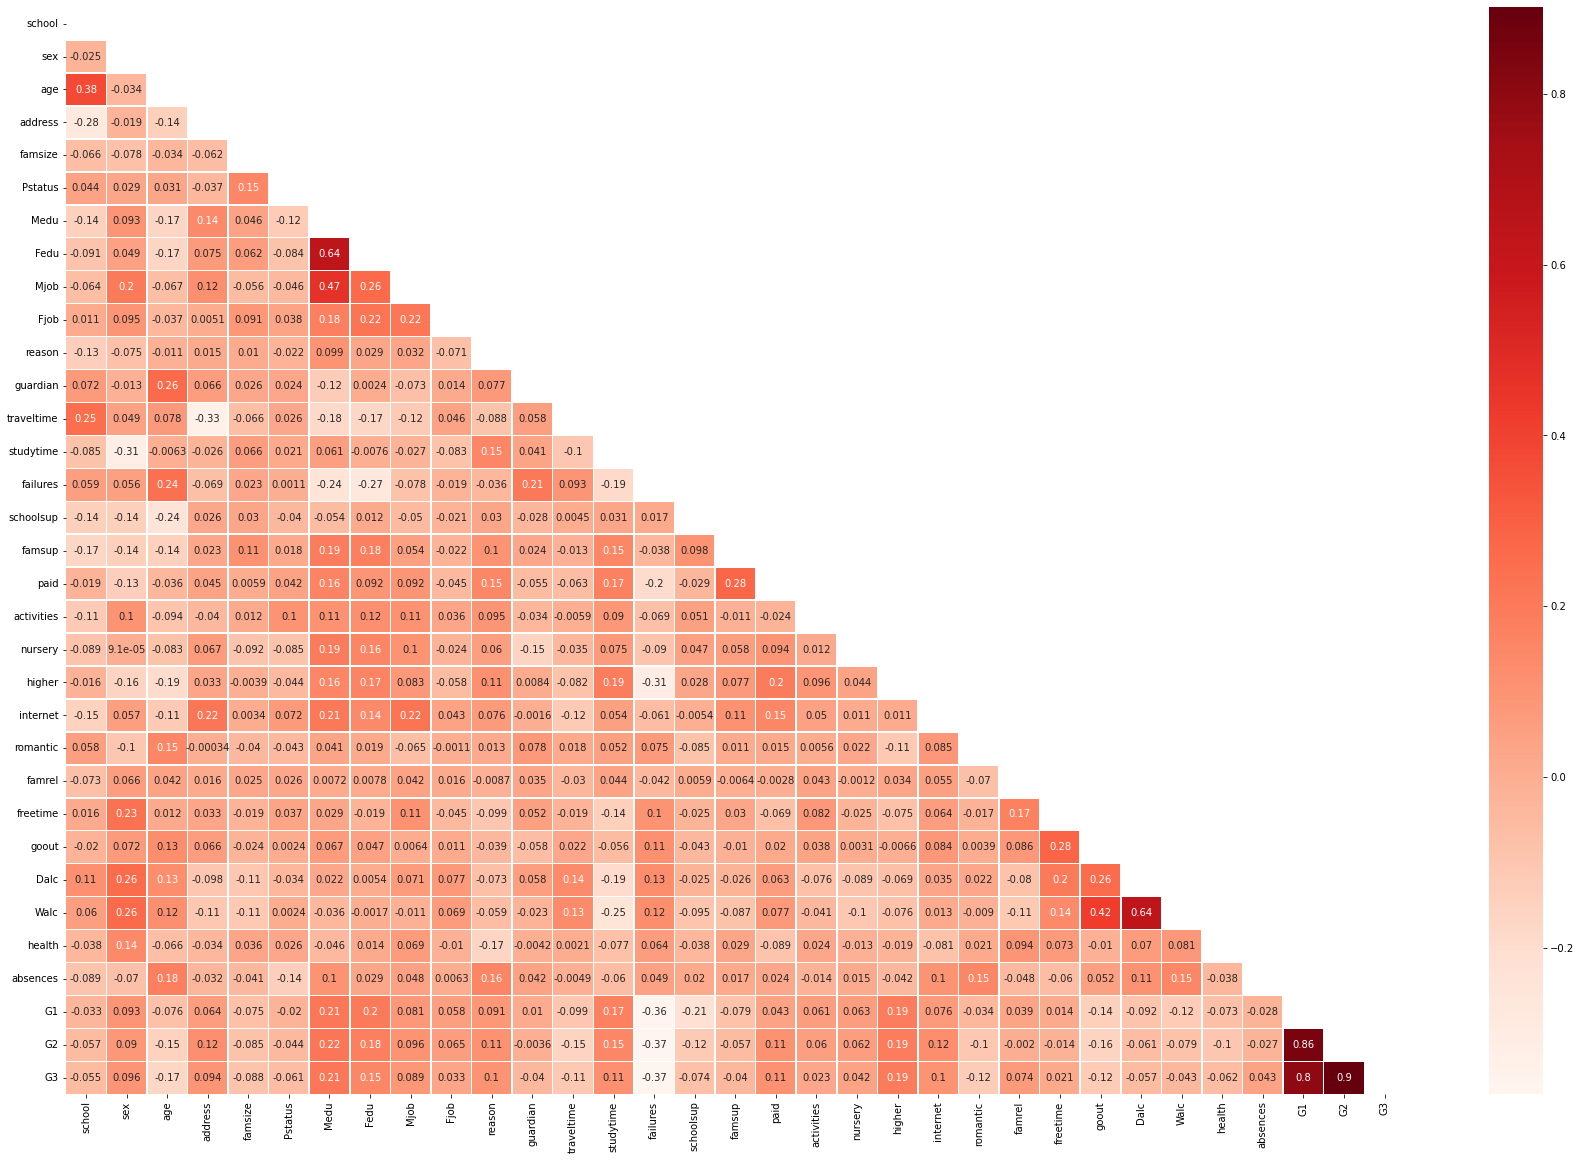

In [20]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(30,20))
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='Reds',annot=True)

#### Role of study time in grades

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

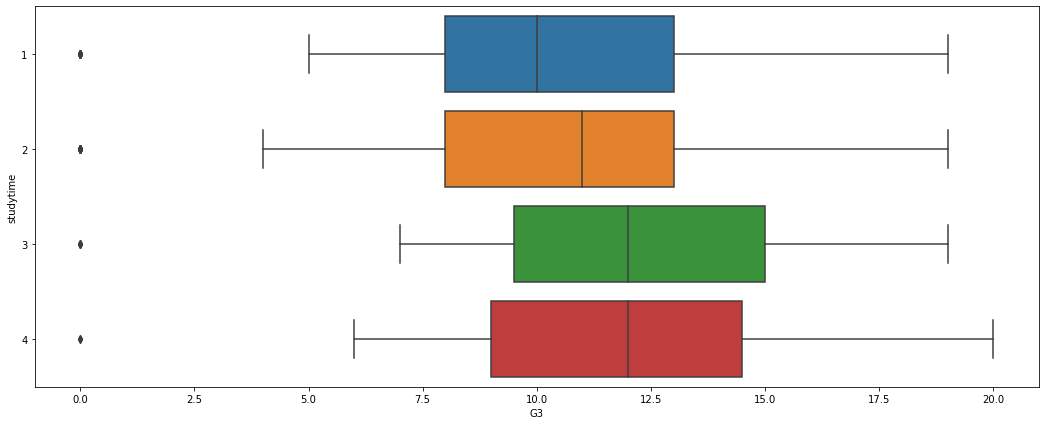

In [21]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="studytime", data=df_examples, orient='h')

#### Analysis of travel time and grades

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

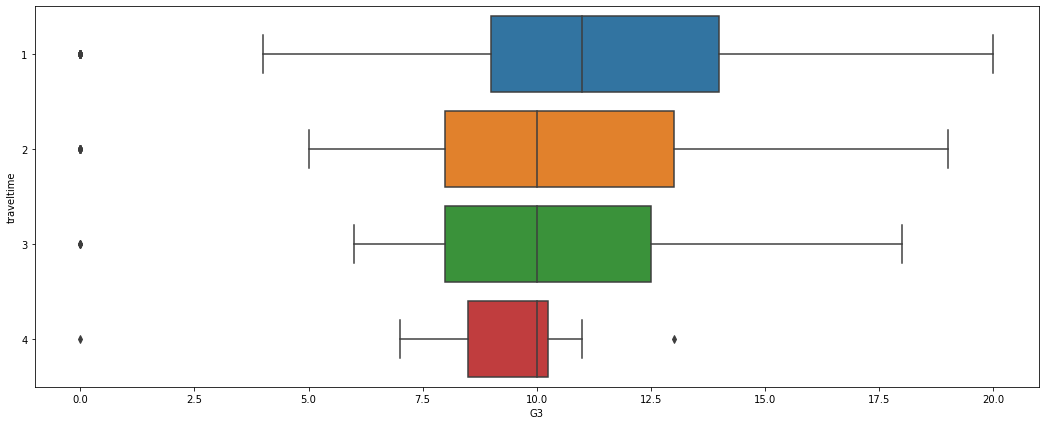

In [22]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="traveltime", data=df_examples, orient='h')

#### Internet connectivity influence with grades

internet - Internet access at home (binary: yes(1) or no(0))

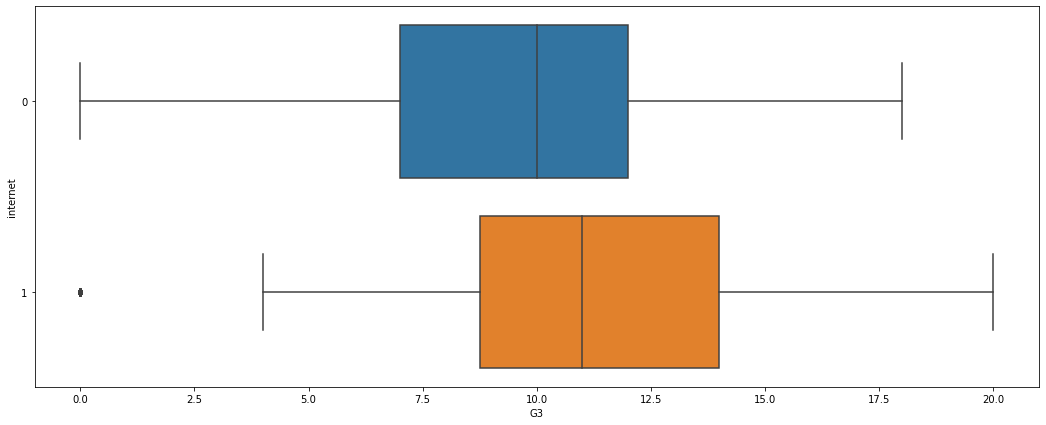

In [23]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="internet", data=df_examples, orient='h')

#### Students with interest to pursue higher education and their grades

higher - wants to take higher education (binary: yes(1) or no(0))

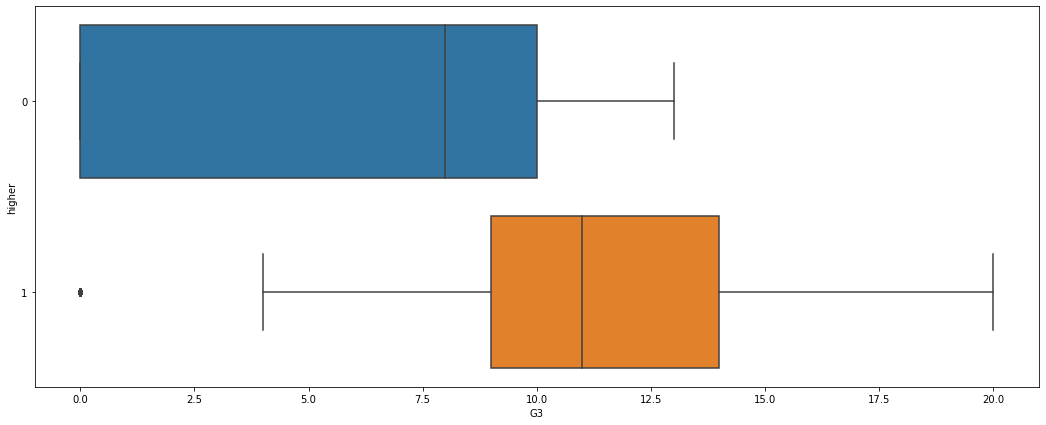

In [24]:
plt.figure(figsize=(18,7))
sns.boxplot(x="G3", y="higher", data=df_examples, orient='h')

#### Past class failures effect on current grades

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

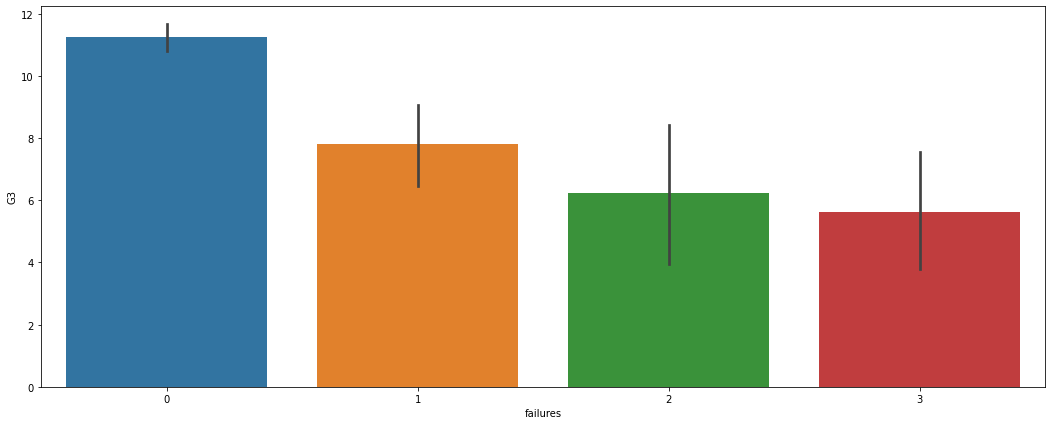

In [25]:
plt.figure(figsize=(18,7))
# sns.boxplot(x="G3", y="failures", data=df_examples, orient='h')
sns.barplot(x="failures", y="G3", data=df_examples)

#### Periodical grades distribution

These grades are related with the course subject, Math:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

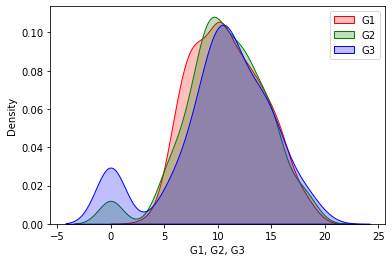

In [26]:
sns.kdeplot(df_examples['G1'],shade=True,color='red')
sns.kdeplot(df_examples['G2'],color='green',shade=True)
sns.kdeplot(df_examples['G3'],color='blue',shade=True)
plt.xlabel("G1, G2, G3")
plt.legend(labels=["G1", "G2", "G3"])
plt.show()

#### Separation of input and target variables

In [27]:
df_X = df_examples.loc[:, df_examples.columns != 'G3']
df_X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,1,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,0,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,1,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,1,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [28]:
df_y = df_examples.loc[:, 'G3']
df_y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

#### Split dataset into train and test sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=21, shuffle=True, stratify=df_examples[["school", "famsize"]])

### Model building and evaluation

#### Linear Regression

In [30]:
lr = LinearRegression()

In [31]:
reg = lr.fit(X_train, y_train)

In [32]:
reg.score(X_train, y_train)

0.8425429152370716

In [33]:
y_pred = lr.predict(X_test)

In [34]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  3.5850213930234296
mean_absolute_error:  1.2271356596521026
r2_score:  0.825825983766694
median_absolute_error:  0.7870937008809822


#### Random Forest

In [35]:
rfr  = RandomForestRegressor()

In [36]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
rfr.score(X_train, y_train)

0.9841418737501804

##### collect important featues

In [38]:
feats = {} 
for feature, importance in zip(df_examples.columns, rfr.feature_importances_):
    feats[feature] = importance

In [39]:
sorted(feats, key=feats.get, reverse=True)

['G2',
 'absences',
 'age',
 'famrel',
 'reason',
 'Mjob',
 'G1',
 'health',
 'studytime',
 'activities',
 'guardian',
 'freetime',
 'schoolsup',
 'failures',
 'goout',
 'paid',
 'Walc',
 'Fjob',
 'Medu',
 'traveltime',
 'Fedu',
 'Dalc',
 'romantic',
 'nursery',
 'school',
 'address',
 'famsize',
 'sex',
 'Pstatus',
 'famsup',
 'internet',
 'higher']

In [40]:
y_pred = rfr.predict(X_test)

In [41]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  1.774375609756097
mean_absolute_error:  0.7360975609756095
r2_score:  0.9137940635838151
median_absolute_error:  0.4299999999999997


In [42]:
y_pred

array([10.54, 15.06, 14.12, 14.05, 10.94, 15.87, 10.18,  9.11,  7.52,
        6.99,  6.72,  1.42,  5.57, 14.05, 10.82,  9.09,  8.82, 18.02,
        9.2 , 13.06,  9.66,  9.95,  4.89,  9.38,  9.15,  7.9 , 11.56,
       11.57,  8.5 ,  0.  , 12.65, 10.46, 12.57,  0.  ,  9.7 , 12.7 ,
       11.53, 18.24, 11.14, 14.08, 12.94])

#### Decision Tree

In [43]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_train, y_train)

1.0

In [44]:
y_pred = dtr.predict(X_test)

In [45]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.658536585365853
mean_absolute_error:  1.146341463414634
r2_score:  0.7736705202312139
median_absolute_error:  1.0


#### SVM

In [46]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_train, y_train)

0.8056210213313418

In [47]:
y_pred = svr.predict(X_test)

In [48]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  4.075189595161446
mean_absolute_error:  1.1432833062217818
r2_score:  0.8020117425009714
median_absolute_error:  0.6495097017558731


#### ANN

In [49]:
def build_and_compile_model():
    model = keras.Sequential([
#       norm,
      layers.Input(32,),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [50]:
model = build_and_compile_model()

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [52]:
%%time
history = model.fit(
    x=X_train,
    y=y_train,
#     validation_split=0.2,
#     verbose=1,
    epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 3ms/step - loss: 3.6967
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 2.2115
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 1.6437
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 1.4405
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 1.3274
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 1.2531
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 1.1895
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1687
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1623
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1020
Epoch 11/200
12/12 [==============================] - 0s 3ms/step - loss: 1.1263
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 1.1048
Epoch 13/200
12/12 [=================

In [ ]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([0, 10])
#   plt.xlabel('Epoch')
#   plt.ylabel('Error [MPG]')
#   plt.legend()
#   plt.grid(True)

In [ ]:
# plot_loss(history)

In [53]:
y_pred_train = model.predict(X_train)
print("r2_score: ", metrics.r2_score(y_train, y_pred_train))

12/12 [==============================] - 0s 2ms/step
r2_score:  0.9793113946862019


In [54]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [55]:
print("mean_squared_error: ", metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error: ", metrics.mean_absolute_error(y_test, y_pred))
print("r2_score: ", metrics.r2_score(y_test, y_pred))
print("median_absolute_error: ", metrics.median_absolute_error(y_test, y_pred))

mean_squared_error:  2.2213849476113148
mean_absolute_error:  1.0090431323865565
r2_score:  0.8920766445972653
median_absolute_error:  0.6565237045288086


#### Recommendation here

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)
   
Criteria to recommend the subject, Math for higher education
    
 G1 + G2 + G3(predicted) >= Max obtainable grade in a test(20)

In [56]:
df_pred = pd.DataFrame(y_pred.tolist(), columns=["pred"])

In [58]:
# np.add(X_test.G1, X_test.G2)

In [59]:
lists = [X_test.G1.to_list(), X_test.G2.to_list(), df_pred.pred.to_list()]

In [60]:
tot_grad = list(map(sum, zip(*lists)))
np.where(np.array(tot_grad) >= 20)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37,
       38, 39, 40])

In [61]:
np.where(np.array(tot_grad) < 20)

(array([11, 12, 29, 33]),)

In [62]:
X_test.reset_index().loc[np.where(np.array(tot_grad) < 20)[0]]

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
11,251,0,0,18,1,1,1,2,1,2,...,1,4,4,4,1,1,3,0,7,0
12,173,0,0,16,1,1,1,2,2,2,...,0,5,1,5,1,1,4,0,6,7
29,131,0,1,18,0,1,1,2,2,3,...,0,3,3,3,1,2,4,0,7,4
33,148,0,1,17,1,1,1,2,1,2,...,0,5,4,5,1,2,5,0,5,0
